In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import folium
import io
from PIL import Image
import os, time
# from selenium import webdriver
# import geocoder
from tqdm import tqdm
import geopandas as gpd
# import pygeos

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from pingouin import partial_corr
import pingouin as pg

In [1088]:
from sklearn import preprocessing

In [1299]:
df = gpd.read_file('beach_slopes_d50_Australia.geojson')

only sand

In [1300]:
df = df[df['d50']<2]
len(df)

1402

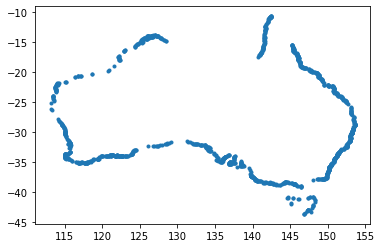

In [1301]:
plt.plot(df['longitude'],df['latitude'],'.')

only east coast

In [1302]:
df = df[df['longitude']>150] #145
len(df)

345

only south

In [1303]:
# df = df[df['latitude']<-25] #145]
# len(df)

only west

In [1304]:
# df = df[df['longitude']<125] #145]
# len(df)

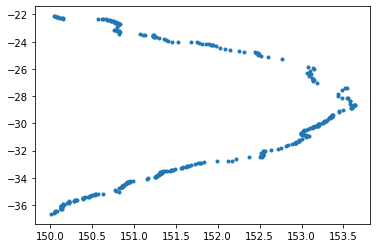

In [1306]:
plt.plot(df['longitude'],df['latitude'],'.')

In [1307]:
df['mstr'] = df['max_tide_obs'] - df['min_tide_obs']
df = df.dropna()
# df.head()
len(df)

345

In [1308]:
# df.keys()

In [1309]:
ind = np.where(df['quality_flag']!='Low')[0]
len(ind)
df = df.iloc[ind]
len(df)

340

In [1310]:
df['d50'].max()

1.87905

In [1132]:
# tmp = df.copy()

In [1133]:
# C=[]
# for counter in range(100):
#     tmp = df.copy()
#     try:

#         tmp['category'] = pd.cut(tmp['latitude'], counter)
#         tmp = tmp.groupby(['category']).apply(lambda x: x.sample(counter, replace = False)).reset_index(drop = True)

#         tmp = tmp.drop_duplicates()  
#     except:
# #         C.append(counter)
#         pass


In [1319]:
tmp = df.copy()

num_cats = 9 #10 #11 
num_samples = 11 #22 #11
tmp['category'] = pd.cut(tmp['latitude'], num_cats)
tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples, replace = False)).reset_index(drop = True)

tmp = tmp.drop_duplicates()  

In [1272]:
# tmp = df.copy()

# counter = 6 #14 #11 #14
# tmp['category'] = pd.cut(tmp['longitude'], counter)
# tmp = tmp.groupby(['category']).apply(lambda x: x.sample(counter, replace = False)).reset_index(drop = True)

# tmp = tmp.drop_duplicates()  

In [1320]:
len(tmp)

99

In [1321]:
df = tmp.copy()
len(df)

99

In [1322]:
bujan_dat = pd.read_csv('../RegionalGrainSizeModel/notebooks/data/bujan_et_al_data/Size-Slope-Data-Points.csv')
bujan_dat#.keys()

bujan_sand = bujan_dat[bujan_dat['Clast size (mm)']<2]

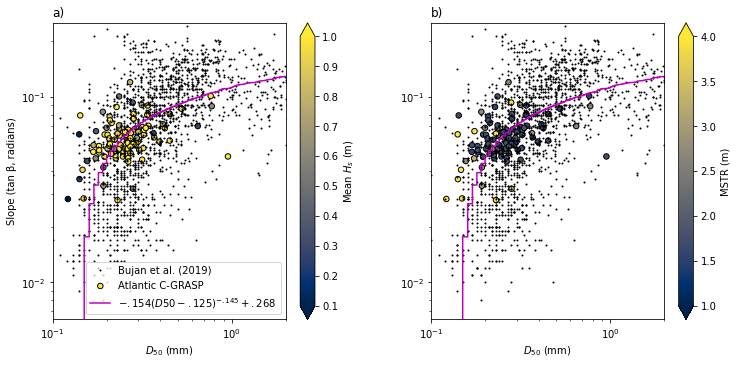

In [1323]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.subplot(221)

plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
# plt.scatter(gs_slope_waves['d50'], gs_slope_waves['tanBeta'],20,gs_slope_waves['hs_mean'],label='Atlantic C-GRASP')
plt.scatter(df['d50'], df['beach_slope_average'],30,df['hsig_median'],label='Atlantic C-GRASP', cmap='cividis', vmin=.1, vmax=1, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

plt.ylabel('Slope (tan β, radians)')
cb = plt.colorbar(extend='both')
plt.title("a)", loc='left')

cb.set_label(r'Mean $H_s$ (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.legend()


plt.subplot(222)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(df['d50'], df['beach_slope_average'],30,df['mstr'],label='Atlantic C-GRASP', cmap='cividis', vmin=1, vmax=4, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'MSTR (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("b)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)

plt.savefig('CGRASP_d50-slope-waveHs-MSTR-Oz.jpg', dpi=300, bbox_inches='tight')

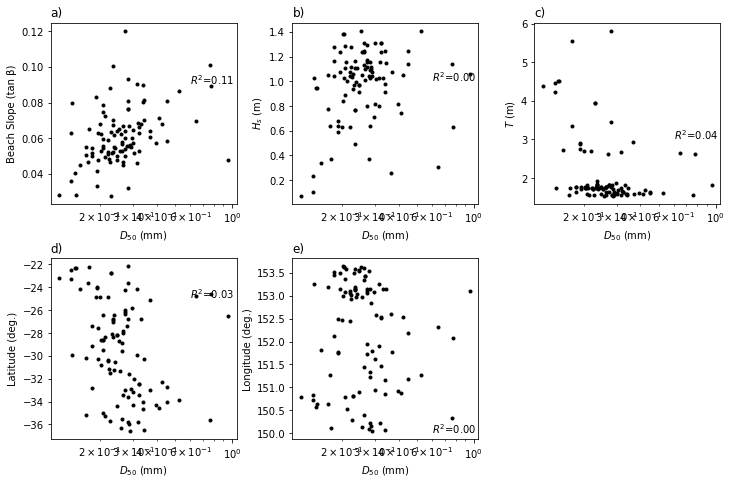

In [1324]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(331)
plt.semilogx(df['d50'], df['beach_slope_average'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Beach Slope (tan β)')
plt.title("a)", loc='left')

# coef = np.polyfit(df['d50'], df['beach_slope_average'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['beach_slope_average']))**2
plt.text(.6,.09,r'$R^2$='+str(r2)[:4])

plt.subplot(332)
plt.semilogx(df['d50'], df['hsig_median'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("b)", loc='left')

# coef = np.polyfit(df['d50'], df['hsig_median'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['hsig_median']))**2
plt.text(.6,1,r'$R^2$='+str(r2)[:4])

plt.subplot(333)
plt.semilogx(df['d50'], df['mstr'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T$ (m)')
plt.title("c)", loc='left')

# coef = np.polyfit(df['d50'], df['mstr'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['mstr']))**2
plt.text(.6,3,r'$R^2$='+str(r2)[:4])


plt.subplot(334)
plt.semilogx(df['d50'], df['latitude'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Latitude (deg.)')
plt.title("d)", loc='left')

# coef = np.polyfit(df['d50'], df['latitude'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['latitude']))**2
plt.text(.6,-25,r'$R^2$='+str(r2)[:4])

plt.subplot(335)
plt.semilogx(df['d50'], df['longitude'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Longitude (deg.)')
plt.title("e)", loc='left')

# coef = np.polyfit(df['d50'], df['longitude'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['longitude']))**2
plt.text(.6,150,r'$R^2$='+str(r2)[:4])

plt.savefig('CGRASP_d50-allcovars-linreg-Oz.jpg', dpi=300, bbox_inches='tight')

In [1325]:
len(df)

99

In [1345]:
def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 10, #5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

test_size = 0.6 #0.75

In [1346]:
rand = np.random.randn(len(df))
np.save('Oz_rand.npy', rand, allow_pickle=True)

In [1347]:
feature_names1 = ['β (radians)', 'T (m)', 'Random'] #'S (m/yr)',
X = np.stack((df['beach_slope_average'],df['mstr'], rand)) #df['trend'],
#lam,df['hs_max'],
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0117


In [1348]:
model1out = {}
model1out['feature_names'] = feature_names1
model1out['Xtest'] = X_test1
model1out['Xtrain'] = X_train1
model1out['ytest'] = y_test1
model1out['ytrain'] = y_train1
model1out['model'] = model1
model1out['mse'] = mse1

In [1349]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'],df['mstr'], rand))
#lam,df['hs_max'],
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

model2 = ensemble.GradientBoostingRegressor(**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0117


In [1350]:
model2out = {}
model2out['feature_names'] = feature_names2
model2out['Xtest'] = X_test2
model2out['Xtrain'] = X_train2
model2out['ytest'] = y_test2
model2out['ytrain'] = y_train2
model2out['model'] = model2
model2out['mse'] = mse2

In [1351]:
feature_names3 = [r'$H_s$ (m)',  'Random (non-dim.)'] #r'$T_p$ (s)', r'$\theta$ (dir.)',
X = np.stack((df['hsig_median'],rand)) #tmp['tp'],tmp['dir'], 
#lam,df['hs_max'],
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0218


In [1352]:
model3out = {}
model3out['feature_names'] = feature_names3
model3out['Xtest'] = X_test3
model3out['Xtrain'] = X_train3
model3out['ytest'] = y_test3
model3out['ytrain'] = y_train3
model3out['model'] = model3
model3out['mse'] = mse3

In [1353]:
feature_names4 = [r'$H_s$ (m)', 'T (m)', 'Random (non-dim.)'] #r'$T_p$ (s)', r'$\theta$ (dir.)',
X = np.stack((df['hsig_median'],df['mstr'], rand)) #,df['tp'],df['dir']
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

model4 = ensemble.GradientBoostingRegressor(**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0128


In [1354]:
model4out = {}
model4out['feature_names'] = feature_names4
model4out['Xtest'] = X_test4
model4out['Xtrain'] = X_train4
model4out['ytest'] = y_test4
model4out['ytrain'] = y_train4
model4out['model'] = model4
model4out['mse'] = mse4

In [1355]:
feature_names5 = ['T (m)', 'Random (non-dim.)']
X = np.stack((df['mstr'], rand))
X.shape

X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train5)
X_train5 = scaler.transform(X_train5)
X_test5 = scaler.transform(X_test5)

model5 = ensemble.GradientBoostingRegressor(**params)
model5.fit(X_train5, y_train5)

mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

The mean squared error (MSE) on test set: 0.0125


In [1356]:
model5out = {}
model5out['feature_names'] = feature_names5
model5out['Xtest'] = X_test5
model5out['Xtrain'] = X_train5
model5out['ytest'] = y_test5
model5out['ytrain'] = y_train5
model5out['model'] = model5
model5out['mse'] = mse5

In [1357]:
feature_names6 = [r'β (radians)', r'$H_s$ (m)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'], df['hsig_median'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)

model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6, model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.0153


In [1358]:
model6out = {}
model6out['feature_names'] = feature_names6
model6out['Xtest'] = X_test6
model6out['Xtrain'] = X_train6
model6out['ytest'] = y_test6
model6out['ytrain'] = y_train6
model6out['model'] = model6
model6out['mse'] = mse6

In [1359]:
feature_names7 = [r'β (radians)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'], rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train7)
X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)

model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7, model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.0154


In [1360]:
model7out = {}
model7out['feature_names'] = feature_names7
model7out['Xtest'] = X_test7
model7out['Xtrain'] = X_train7
model7out['ytest'] = y_test7
model7out['ytrain'] = y_train7
model7out['model'] = model7
model7out['mse'] = mse7

In [1361]:
ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/df['beach_slope_average'],df['hsig_median'])]

a = -0.154
b = -0.145
c = 0.268

ds_est_baseline2 = [bujan(B,a,b,c) for B in df['beach_slope_average']]

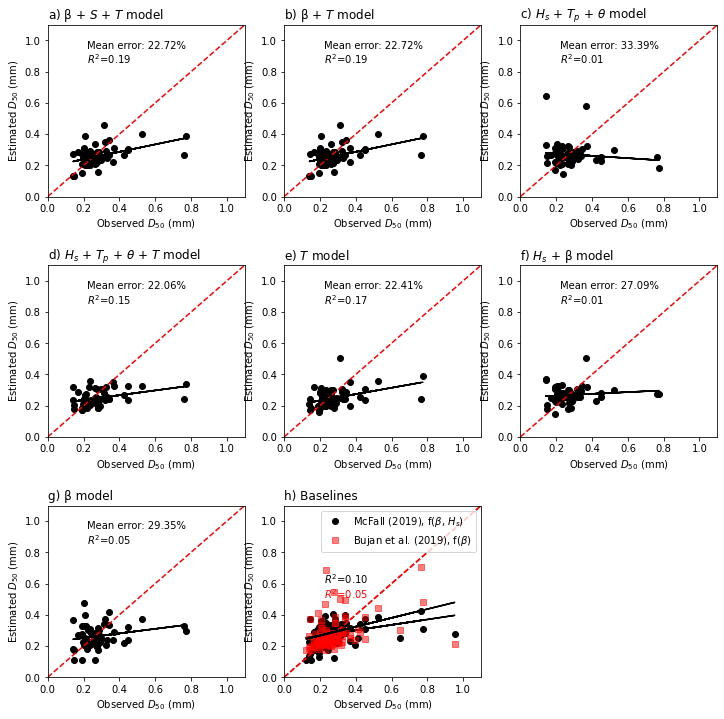

In [1365]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(331)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("a) β + $S$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(332)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:5]))

plt.subplot(333)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))


plt.subplot(334)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))

plt.subplot(335)
ds_est = model5.predict(X_test5)
plt.plot(y_test5, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(336)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) $H_s$ + β model", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:5]))


plt.subplot(337)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"g) β model", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:5]))

plt.subplot(338)
plt.plot(df['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"h) Baselines", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline))**2
plt.text(.22,.6,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

plt.plot(df['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"f) Bujan et al. (2019) relation, f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline2))**2
plt.text(.22,.5,r'$R^2$='+str(r2)[:4], color='r')

coef = np.polyfit(df['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.legend()

plt.savefig('CGRASP_d50-6models_Oz.jpg', dpi=300, bbox_inches='tight')
# plt.close()

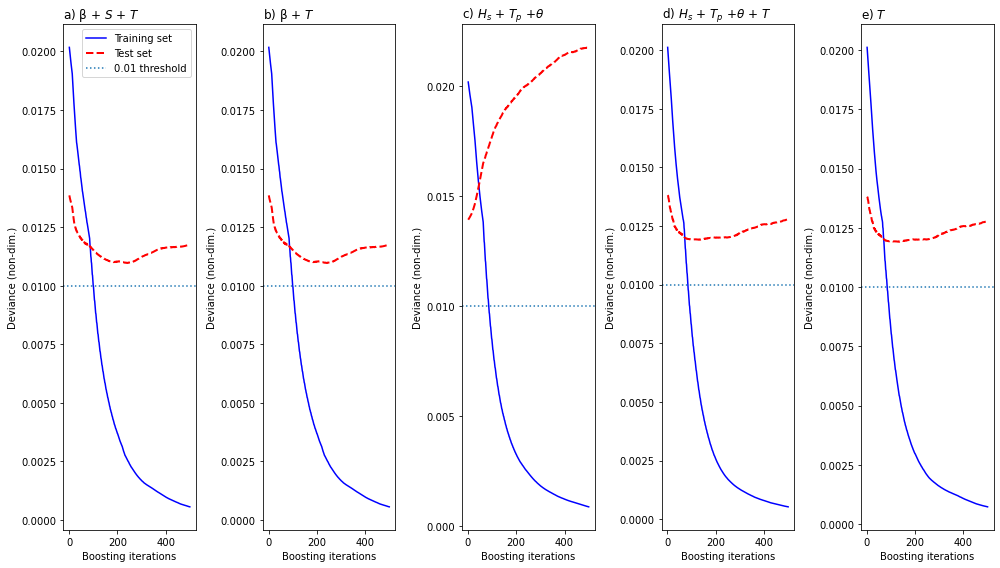

In [1366]:
fig=plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 5, 1)
plt.title("a) β + $S$ + $T$ ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 5, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 5, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 5, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 5, 5)
plt.title(r"e) $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model5.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training_Oz.jpg', dpi=300, bbox_inches='tight')

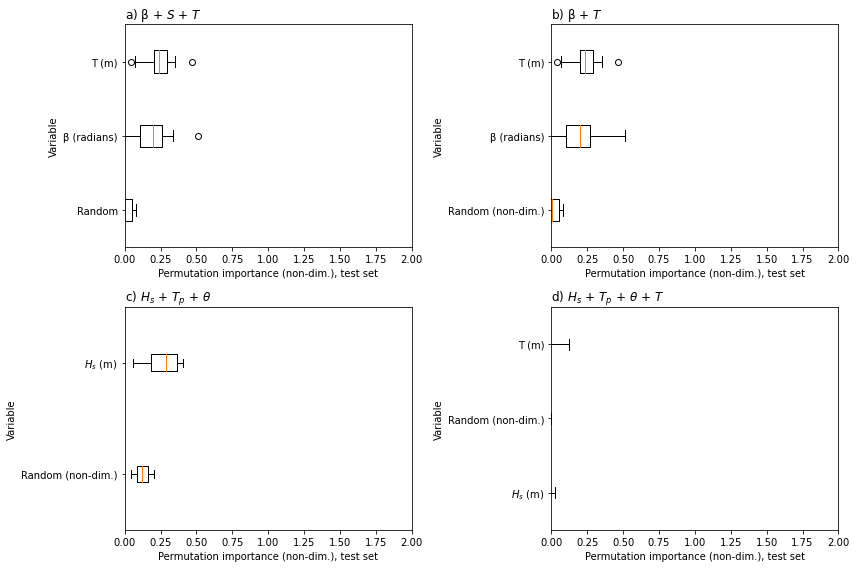

In [1157]:
fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(221)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names1)[sorted_idx],
)
plt.xlim(0,2)
plt.title("a) β + $S$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")


result = permutation_importance(
    model2, X_test2, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(222)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names2)[sorted_idx],
)

plt.xlim(0,2)
plt.title("b) β + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(223)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names3)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model4, X_test4, y_test4, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(224)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names4)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

fig.tight_layout()

plt.savefig('CGRASP_d50-4models-featimps_Oz.jpg', dpi=300, bbox_inches='tight')

In [1119]:
from sklearn.neural_network import MLPRegressor

In [1158]:
model1 = MLPRegressor()#**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

model2 = MLPRegressor()#**params)
model2.fit(X_train2, y_train2)
mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

model3 = MLPRegressor()#**params)
model3.fit(X_train3, y_train3)
mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

model4 = MLPRegressor()#**params)
model4.fit(X_train4, y_train4)
mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

model5 = MLPRegressor()#**params)
model5.fit(X_train5, y_train5)
mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

The mean squared error (MSE) on test set: 0.0237
The mean squared error (MSE) on test set: 0.0415
The mean squared error (MSE) on test set: 0.0234
The mean squared error (MSE) on test set: 0.0459
The mean squared error (MSE) on test set: 0.0224


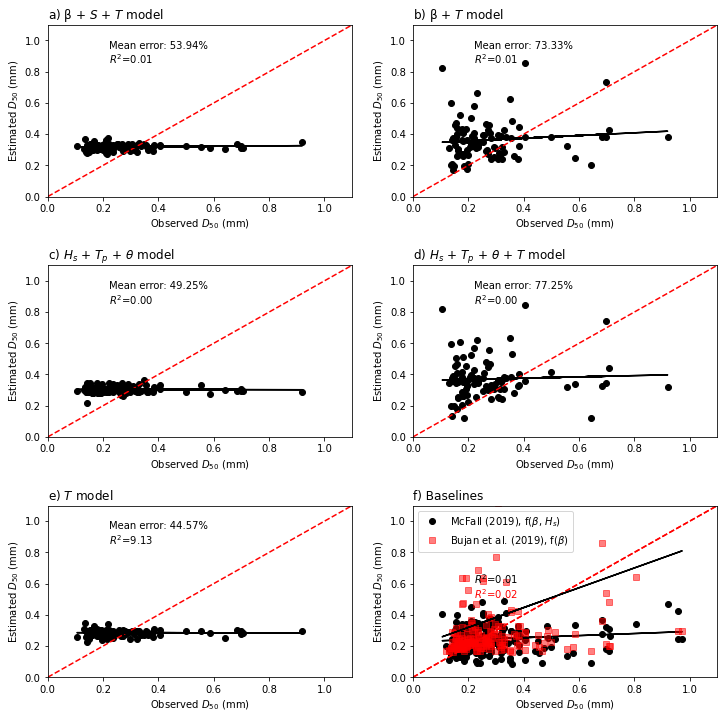

In [1159]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(321)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("a) β + $S$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(322)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:5]))

plt.subplot(323)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))


plt.subplot(324)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))

plt.subplot(325)
ds_est = model5.predict(X_test5)
plt.plot(y_test5, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(326)
plt.plot(df['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) Baselines", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline))**2
plt.text(.22,.6,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

plt.plot(df['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"f) Bujan et al. (2019) relation, f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline2))**2
plt.text(.22,.5,r'$R^2$='+str(r2)[:4], color='r')

coef = np.polyfit(df['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.legend()

# plt.savefig('CGRASP_d50-6models_Oz.jpg', dpi=300, bbox_inches='tight')
# # plt.close()